# 2.1 Generate engineered features (scaled recipe principal component) for Game 2

In [ ]:
# Alternatively, use function in game/src/game_2_builder.py

In [1]:
from game.utils import run_query
import numpy as np
from game.flaskapp_andrius.api import preprocesser
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from game.src.feature_generator import get_embedding, get_vector_list, get_euc_dist_from_origin
from game.src.game_2_builder import get_scaled_pc_by_fg

In [2]:
# Takes the NEW recipe table with images updated
df_recipes = pd.read_csv('../data/recipe_table.csv', sep=';')

In [3]:
df_recipes['price'] = df_recipes['price_2p_pence']
df_clean = df_recipes[['id', 'food_group', 'calories', 'carbs', 'fat',
                      'protein', 'cooking_time', 'title', 'description',
                      'key_ingredient', 'price', 'image_url']]
recipe_dict = df_clean.to_dict(orient='records')
list_of_embeddings = get_embedding(recipe_dict)
df_clean['embedding'] = list_of_embeddings

In [4]:
# Make new dataframe that contains vector, embedding, magnitude etc
list_of_vectors = get_vector_list(recipe_dict)
df_clean['vector'] = list_of_vectors
df_vector = pd.DataFrame(df_clean[['id', 'embedding', 'vector', 'image_url']])
df_vector['magnitude'] = df_vector['vector'].apply(lambda x: get_euc_dist_from_origin(x))
df_vector['magnitude'] = df_vector['magnitude'].astype(np.float)

In [5]:
# Expand 45D vector into new dataframe
df_vector_sep = pd.DataFrame(data=df_vector['vector'][0])
df_vector_sep = df_vector_sep.transpose()

# start at 1 since we have used the index 0 to make the new dataframe
for i in range(1, len(df_recipes)):
    vec = pd.DataFrame(data=df_vector['vector'][i])
    vec = vec.transpose()
    df_vector_sep = df_vector_sep.append(vec)
    
df_vector_sep = df_vector_sep.reset_index(drop=True)
df_vector_sep

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.064722,-0.003410,-0.008667,-0.004381,-0.029277,0.037111,0.087140,0.038523,-0.003277,0.071937,...,0.005091,-0.021833,-0.000292,0.001613,-0.016424,0.007175,0.029180,0.010948,0.006308,-0.027770
1,0.396882,-0.252702,-0.081119,0.149114,0.197869,-0.153394,-0.242193,-0.151603,0.013745,0.002879,...,-0.189128,-0.117461,0.066719,-0.100290,0.049714,-0.007647,-0.068826,-0.045203,0.027971,-0.024209
2,0.044017,-0.025803,0.016796,-0.028905,0.034739,0.027916,0.047573,0.079535,0.031402,-0.029135,...,0.031248,0.041970,0.008615,0.047638,0.003788,0.040352,0.032915,0.011552,0.096741,-0.047702
3,0.171070,-0.000320,0.004946,0.021136,-0.094452,-0.148432,-0.121912,-0.079571,-0.039466,-0.130727,...,-0.166750,-0.018543,-0.187594,-0.205586,-0.152579,0.000422,-0.037671,-0.227148,0.118722,-0.006055
4,0.318594,0.239629,-0.274331,0.121123,0.027847,0.037802,-0.001693,-0.092206,-0.099178,0.094786,...,0.157644,0.061975,0.354749,-0.070620,-0.081776,0.006372,0.007951,-0.111016,-0.057827,-0.031853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,0.113593,0.017327,0.245383,0.114117,0.035842,0.102414,0.038531,0.213501,-0.074485,-0.051018,...,-0.145206,0.343134,-0.033128,0.068676,0.368044,0.121652,-0.007155,-0.067309,-0.073872,-0.156564
671,0.195424,0.002668,0.119832,0.089651,-0.158571,-0.224435,-0.168666,0.017099,-0.052655,0.023751,...,0.033786,-0.045776,-0.053366,-0.006579,0.108709,-0.266867,-0.106707,-0.097009,0.006238,0.075881
672,0.278713,-0.145278,-0.096370,-0.056641,-0.159557,-0.045188,0.178785,0.283481,0.103038,0.335249,...,-0.073220,0.078606,-0.083907,-0.069778,-0.078826,-0.029973,-0.139784,0.072950,-0.075854,0.046907
673,0.121081,-0.065710,-0.016332,-0.110068,-0.037013,-0.073359,0.124492,0.223484,0.071921,0.078259,...,-0.006982,0.152729,-0.032185,-0.031254,-0.070968,-0.026976,-0.010891,0.127331,-0.003251,0.120247


In [6]:
# Transfer embedding, vector etc into clean file for export
df_export = pd.concat([df_vector, df_vector_sep], axis=1)
df_export = df_export[['id', 'embedding', 'magnitude', 'vector', 0,
                 1,           2,           3,           4,           5,
                 6,           7,           8,           9,          10,
                11,          12,          13,          14,          15,
                16,          17,          18,          19,          20,
                21,          22,          23,          24,          25,
                26,          27,          28,          29,          30,
                31,          32,          33,          34,          35,
                36,          37,          38,          39,          40,
                41,          42,          43,          44]]

df_export.to_csv('../data/embedding_table.csv', index=False)

In [7]:
# Scale sparated vectors in preparation for PCA
scaler = MinMaxScaler()
df_rescaled = scaler.fit_transform(df_vector_sep)

# Generate enough components to account for 95% of the variance
pca_95_var = PCA(n_components=0.95)
pca_95_var_ft = pca_95_var.fit_transform(df_rescaled)
df_pca = pd.DataFrame(pca_95_var_ft)

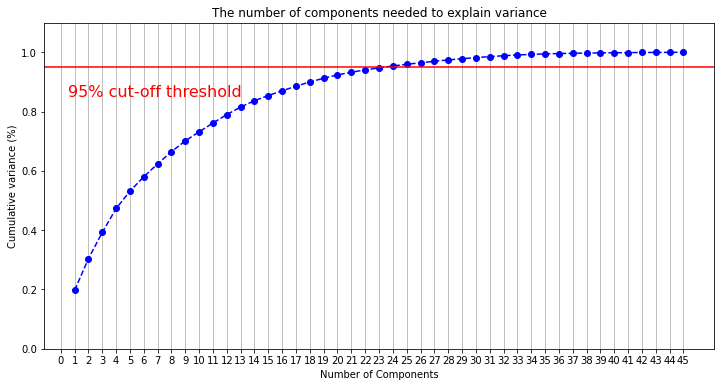

In [8]:
# Find optimal number of dimensions for accounting 95% variance
pca = PCA().fit(df_rescaled)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 46, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 46, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()

In [9]:
# Generate new dataframe that contains all the principal components
df_final_pca = pd.DataFrame(df_vector['id'])
df_final_pca = pd.concat([df_final_pca, df_pca], axis=1)
col_list = ['id']

# Numbering of columns, start numbering at 1
for i in range(1, len(df_final_pca.columns)):
    col_list.append('PC_'+str(i))
    
df_final_pca.columns=col_list

df_final_pca[['title', 'food_group', 'key_ingredient', 'image_url']] = df_clean[['title', 'food_group', 'key_ingredient', 'image_url']]
df_final_pca.head(1)

# Generate CSV with all principal components
df_final_pca.to_csv('../data/df_full_pca.csv', index=False)

In [10]:
# Generate csv with just 3 PC
# No scaling by food group yet
df_3_pc = df_final_pca[['id', 'title', 'food_group', 'key_ingredient', 'image_url', 'PC_1', 'PC_2', 'PC_3']].copy()
df_3_pc
df_3_pc.to_csv('../data/df_3_pc.csv', index=False)

<AxesSubplot:xlabel='PC_1', ylabel='Density'>

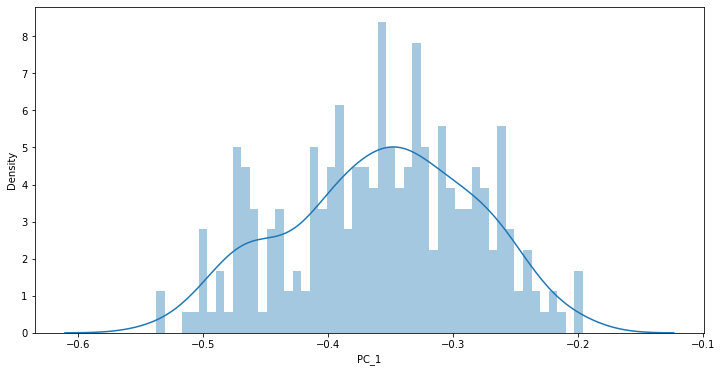

In [11]:
# Distribution of PC1 for vegan food group
sns.distplot(df_final_pca[df_final_pca['food_group']=='Vegan']['PC_1'], bins=50)

<AxesSubplot:ylabel='Density'>

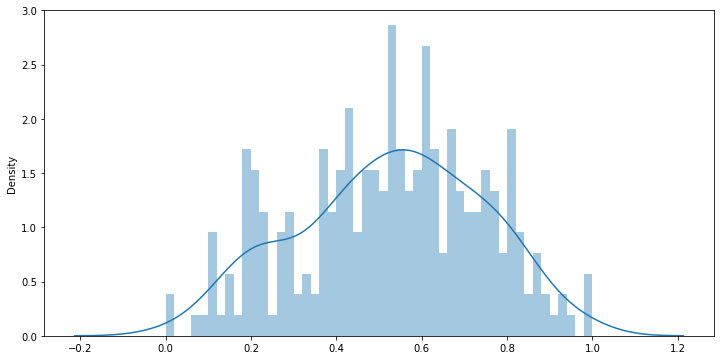

In [12]:
# Distribution of vegan food group PC1, scaled from 0-1
pc1_scaler = MinMaxScaler()
sns.distplot(pd.DataFrame(pc1_scaler.fit_transform(df_final_pca[df_final_pca['food_group']=='Vegan']['PC_1'].values.reshape((-1,1))), columns=['PC_1']), bins=50)

In [13]:
fg = ['Vegan', 'Beef', 'Chicken', 'Fish', 'Pork', 'Lamb']

# Generate CSVs that input into Game 2
for food in fg:
    get_scaled_pc_by_fg(df_3_pc, food)

CSV generated for Vegan
CSV generated for Beef
CSV generated for Chicken
CSV generated for Fish
CSV generated for Pork
CSV generated for Lamb
